In [6]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

data = scipy.io.loadmat('/content/HW4data_Python.mat')

# 'X'는 입력 데이터로, 2차원 좌표를 가진 400개의 샘플입니다.
X = data['X']  # shape: (400, 2)

# 'T'는 정답 레이블로, 각 데이터가 어떤 클래스에 속하는지를 나타냅니다 (1 또는 -1).
T = data['T'].flatten()  # shape: (400,)로 1차원 배열로 변환합니다.

# 데이터의 크기와 클래스 종류를 출력하여, 제대로 불러왔는지 확인합니다.
print("X의 크기:", X.shape)   # (400, 2)
print("T의 크기:", T.shape)   # (400,)
print("클래스 종류:", np.unique(T))  # [ -1, 1 ]

X의 크기: (400, 2)
T의 크기: (400,)
클래스 종류: [-1.  1.]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51704 (\N{HANGUL SYLLABLE JJAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51669 (\N{HANGUL SYLLABLE JING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

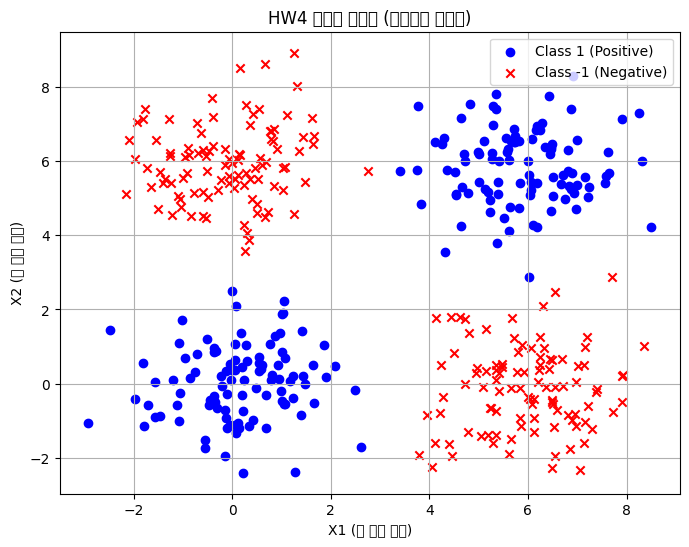

In [7]:
# 클래스가 1인 데이터만 추출 (양의 클래스)
X_pos = X[T == 1]

# 클래스가 -1인 데이터만 추출 (음의 클래스)
X_neg = X[T == -1]

# 산점도 그래프 그리기
plt.figure(figsize=(8, 6))  # 그래프의 크기 설정
plt.scatter(X_pos[:, 0], X_pos[:, 1], color='blue', marker='o', label='Class 1 (Positive)')
plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', marker='x', label='Class -1 (Negative)')
plt.title('HW4 데이터 시각화 (클래스별 산점도)')
plt.xlabel('X1 (첫 번째 특징)')
plt.ylabel('X2 (두 번째 특징)')
plt.legend()  # 주석 추가
plt.grid(True)  # 격자 추가
plt.show()

21회차에서 조기 종료: 오차 = 0.0480
최종 오차: 0.0480


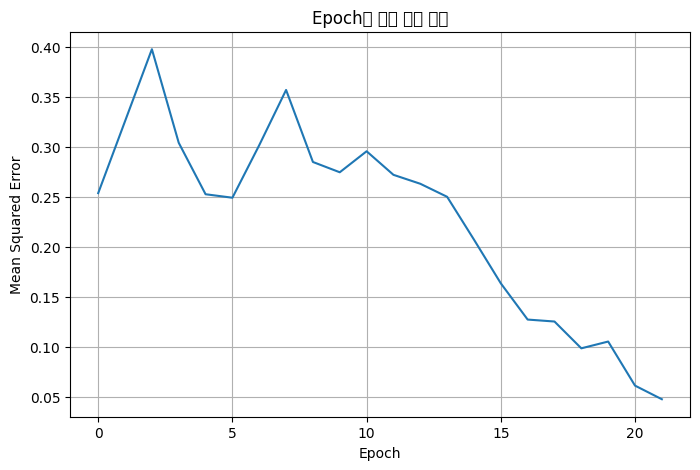

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

# 실험 결과가 반복할 때마다 달라지지 않도록 난수 시드를 고정
np.random.seed(42)

# === 1. 데이터 불러오기 및 전처리 ===
data = scipy.io.loadmat('/content/HW4data_Python.mat')

# X: 입력 데이터 (2차원 좌표 400개), T: 정답 레이블 (1 또는 -1)
X = data['X']
T = data['T'].flatten()

# 퍼셉트론은 출력값을 0~1로 계산하기 때문에, 레이블을 0과 1로 변환
T = (T + 1) // 2   # -1 → 0, 1 → 1

# === 2. 신경망 구조 설정 ===
input_size = 2      # 입력 뉴런: X1, X2
hidden_size = 5     # 은닉 뉴런: 실험적으로 5개 설정
output_size = 1     # 출력 뉴런: 클래스가 0 또는 1인지 판단

# 학습 관련 하이퍼파라미터
learning_rate = 0.1
max_epochs = 1000
error_threshold = 0.05  # 오차가 5%보다 작아지면 학습 중단

# === 3. 시그모이드 함수 정의 ===
# 뉴런의 활성화 함수로 사용
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 시그모이드 함수의 도함수: 역전파에서 필요함
def sigmoid_derivative(y):
    return y * (1 - y)

# === 4. 가중치 및 바이어스 초기화 ===
# 입력층 → 은닉층
W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros(hidden_size)

# 은닉층 → 출력층
W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros(output_size)

# === 5. 학습 루프 시작 ===
losses = []  # 에폭마다 오차값 저장

for epoch in range(max_epochs):
    # --- 순전파(Forward Propagation) ---
    # 입력층에서 은닉층으로 전달
    z1 = X @ W1 + b1        # 선형변환 (dot product + bias)
    a1 = sigmoid(z1)        # 은닉층 활성화값

    # 은닉층에서 출력층으로 전달
    z2 = a1 @ W2 + b2       # 최종 출력 전 계산
    a2 = sigmoid(z2)        # 최종 출력값 (0~1 사이)

    # --- 오차 계산 ---
    error = T.reshape(-1, 1) - a2  # 예측값과 정답의 차이
    loss = np.mean(error**2)      # 평균 제곱 오차
    losses.append(loss)

    # 오차가 충분히 작아졌다면 조기 종료
    if loss < error_threshold:
        print(f"{epoch}회차에서 조기 종료: 오차 = {loss:.4f}")
        break

    # --- 역전파(Backpropagation) ---
    # 출력층에서 역방향으로 오차 전달

    # 출력층 델타 (오차 × 시그모이드 도함수)
    d2 = error * sigmoid_derivative(a2)

    # 은닉층 델타 (출력층 오차를 은닉층으로 전파)
    d1 = d2 @ W2.T * sigmoid_derivative(a1)

    # --- 가중치 업데이트 (Gradient Descent) ---
    # 출력층 가중치 및 바이어스 업데이트
    W2 += a1.T @ d2 * learning_rate
    b2 += np.sum(d2, axis=0) * learning_rate

    # 은닉층 가중치 및 바이어스 업데이트
    W1 += X.T @ d1 * learning_rate
    b1 += np.sum(d1, axis=0) * learning_rate

# === 6. 최종 오차 출력 ===
print(f"최종 오차: {loss:.4f}")

# === 7. 오차 변화 시각화 ===
plt.figure(figsize=(8, 5))
plt.plot(losses)
plt.title('Epoch에 따른 오차 변화')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

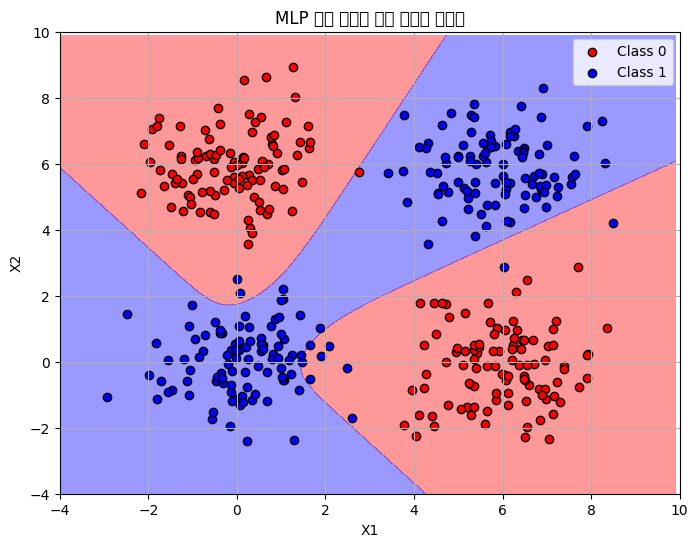

In [14]:
# === 8. 결정 경계 시각화 ===

# meshgrid 생성: [-4, 10] 구간을 0.1 단위로 나눠서 모든 좌표쌍 만들기
x_min, x_max = -4, 10
y_min, y_max = -4, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# 그리드 좌표 (N x 2)로 reshape
grid = np.c_[xx.ravel(), yy.ravel()]

# 그리드 좌표에 대해 MLP 모델로 예측 수행
z1 = grid @ W1 + b1
a1 = sigmoid(z1)
z2 = a1 @ W2 + b2
a2 = sigmoid(z2)

# 결과를 원래 meshgrid 모양으로 reshape
Z = a2.reshape(xx.shape)

# 시각화
plt.figure(figsize=(8, 6))
# 결정 경계 색칠 (Z가 0.5인 지점이 경계선)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.4, colors=['red', 'blue'])

# 원래 데이터 산점도도 함께 표시
plt.scatter(X[T == 0, 0], X[T == 0, 1], color='red', label='Class 0', edgecolor='k')
plt.scatter(X[T == 1, 0], X[T == 1, 1], color='blue', label='Class 1', edgecolor='k')

plt.title('MLP 결정 경계와 학습 데이터 시각화')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

테스트 입력에 대한 신경망 출력값:
데이터 1 (입력 [0 0]): 출력값 = 0.9771
데이터 2 (입력 [6 6]): 출력값 = 0.6879
데이터 3 (입력 [0 6]): 출력값 = 0.0612
데이터 4 (입력 [6 0]): 출력값 = 0.0748
데이터 5 (입력 [3 2]): 출력값 = 0.5671


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


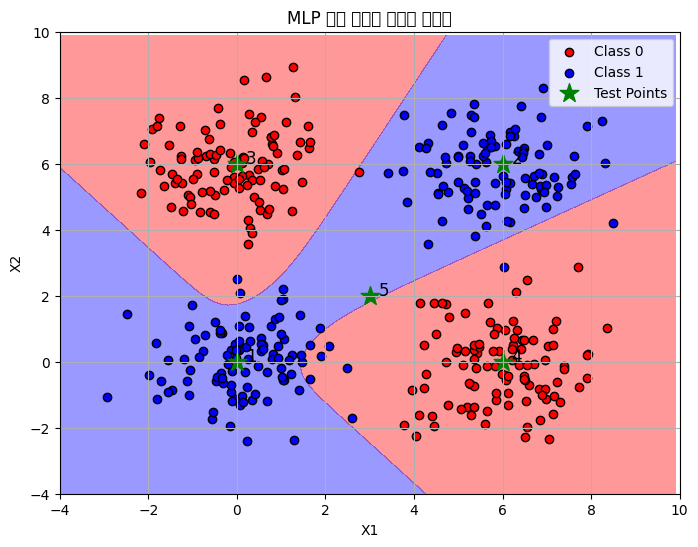

In [15]:
# === 9. 테스트용 입력 좌표 추가 시각화 ===

# 테스트할 다섯 개 데이터 포인트
test_points = np.array([
    [0, 0],
    [6, 6],
    [0, 6],
    [6, 0],
    [3, 2]
])

# 신경망 출력 계산 함수
def mlp_predict(x):
    # x는 (2,) 크기의 벡터라고 가정
    z1 = x @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)
    return a2.item()  # 스칼라로 변환해서 출력

# 각 포인트에 대해 신경망 출력값을 계산
print("테스트 입력에 대한 신경망 출력값:")
for i, pt in enumerate(test_points):
    y = mlp_predict(pt)
    print(f"데이터 {i+1} (입력 {pt}): 출력값 = {y:.4f}")

# 결정 경계 및 데이터와 함께 시각화
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.4, colors=['red', 'blue'])

# 학습 데이터
plt.scatter(X[T == 0, 0], X[T == 0, 1], color='red', label='Class 0', edgecolor='k')
plt.scatter(X[T == 1, 0], X[T == 1, 1], color='blue', label='Class 1', edgecolor='k')

# 새로운 테스트 포인트 (초록색 별모양)
plt.scatter(test_points[:, 0], test_points[:, 1],
            color='green', marker='*', s=200, label='Test Points')

# 각 포인트에 번호 붙이기
for i, pt in enumerate(test_points):
    plt.text(pt[0] + 0.2, pt[1], f'{i+1}', fontsize=12, color='black')

plt.title('MLP 결정 경계와 테스트 포인트')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

In [16]:
# 은닉 뉴런을 3개로 줄인 MLP 학습
# 성공적인 케이스와 실패 케이스를 각각 시도

def my_mlp(hidden_size, seed):
    np.random.seed(seed)  # 시드를 고정해서 재현 가능한 결과를 얻음

    # 초기 가중치와 바이어스 설정
    W1 = np.random.randn(2, hidden_size) * 0.1
    b1 = np.zeros(hidden_size)

    W2 = np.random.randn(hidden_size, 1) * 0.1
    b2 = np.zeros(1)

    max_iter = 1000
    losses = []

    for i in range(max_iter):
        # 순전파
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)

        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        # 평균 제곱 오차 (MSE)
        diff = T.reshape(-1, 1) - a2
        loss = np.mean(diff ** 2)
        losses.append(loss)

        # 조기 종료 조건
        if loss < 0.05:
            break

        # 역전파
        delta2 = diff * sigmoid_derivative(a2)
        delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(a1)

        # 가중치 업데이트 (그냥 업데이트)
        W2 += np.dot(a1.T, delta2) * 0.1
        b2 += np.sum(delta2, axis=0) * 0.1

        W1 += np.dot(X.T, delta1) * 0.1
        b1 += np.sum(delta1, axis=0) * 0.1

    return W1, b1, W2, b2, losses, loss, i


# 성공적인 학습 찾기 (운이 좋아야 함)
for trial in range(200):
    W1_s, b1_s, W2_s, b2_s, losses_s, final_loss_s, epoch_s = my_mlp(3, trial)
    if final_loss_s < 0.05:
        print("성공적인 학습 발견! (seed =", trial, ")")
        break

# 불완전한 학습 찾기 (수렴 안 한 경우)
for trial in range(200, 400):
    W1_f, b1_f, W2_f, b2_f, losses_f, final_loss_f, epoch_f = my_mlp(3, trial)
    if final_loss_f >= 0.05:
        print("불완전한 학습 발견! (seed =", trial, ")")
        break

불완전한 학습 발견! (seed = 200 )
